In [2]:
import pandas as pd
import numpy as np
import sklearn as skl
import matplotlib.pyplot as plt

# importar librerias de preprocesamiento
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

# importar metricas
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [3]:
tabla=pd.read_csv(r"C:\Users\Usuario\Documents\R Files\argentina (2).csv",delimiter=",")
t2=pd.DataFrame(tabla)
t2

,province,gdp,illiteracy,poverty,deficient_infra,school_dropout,no_healthcare,birth_mortal,pop,movie_theatres_per_cap,doctors_per_cap
0,Buenos Aires,2.926899e+08,1.383240,8.167798,5.511856,0.766168,48.7947,4.4,15625084,0.000006,0.004836
1,Catamarca,6.150949e+06,2.344140,9.234095,10.464484,0.951963,45.0456,1.5,367828,0.000005,0.004502
2,Córdoba,6.936374e+07,2.714140,5.382380,10.436086,1.035056,45.7640,4.8,3308876,0.000011,0.010175
3,Corrientes,7.968013e+06,5.602420,12.747191,17.438858,3.864265,62.1103,5.9,992595,0.000004,0.004495
4,Chaco,9.832643e+06,7.517580,15.862619,31.479527,2.577462,65.5104,7.5,1055259,0.000003,0.003605
5,Chubut,1.774785e+07,1.548060,8.051752,8.044618,0.586309,39.5473,3.0,509108,0.000016,0.004498
6,Entre Ríos,2.074341e+07,3.185580,7.288751,18.794568,1.887188,48.6571,3.1,1235994,0.000006,0.004679
7,Formosa,3.807057e+06,4.610640,17.035583,28.004985,2.268974,65.8126,16.2,530162,0.000004,0.003440
8,Jujuy,6.484938e+06,2.151390,13.367965,12.483179,0.721295,54.1615,3.7,673307,0.000003,0.003958
9,La Pampa,6.990262e+06,1.539300,3.398774,16.505714,0.204093,45.4764,7.2,318951,0.000019,0.005415


In [4]:
q1=7.472753782258431
q2=9.142439505726308
q3=12.500143

q1,q2,q3

# Crea columna vacia
t2['poverty_index']=''

#establece condicionales para col. vacia
t2.loc[t2['poverty']<q1,'poverty_index'] ='Low'
t2.loc[(t2['poverty']>=q1)&(t2['poverty']<q2),'poverty_index'] ='Middle'
t2.loc[t2['poverty']>=q2,'poverty_index'] ='High'
t2


,province,gdp,illiteracy,poverty,deficient_infra,school_dropout,no_healthcare,birth_mortal,pop,movie_theatres_per_cap,doctors_per_cap,poverty_index
0,Buenos Aires,2.926899e+08,1.383240,8.167798,5.511856,0.766168,48.7947,4.4,15625084,0.000006,0.004836,Middle
1,Catamarca,6.150949e+06,2.344140,9.234095,10.464484,0.951963,45.0456,1.5,367828,0.000005,0.004502,High
2,Córdoba,6.936374e+07,2.714140,5.382380,10.436086,1.035056,45.7640,4.8,3308876,0.000011,0.010175,Low
3,Corrientes,7.968013e+06,5.602420,12.747191,17.438858,3.864265,62.1103,5.9,992595,0.000004,0.004495,High
4,Chaco,9.832643e+06,7.517580,15.862619,31.479527,2.577462,65.5104,7.5,1055259,0.000003,0.003605,High
5,Chubut,1.774785e+07,1.548060,8.051752,8.044618,0.586309,39.5473,3.0,509108,0.000016,0.004498,Middle
6,Entre Ríos,2.074341e+07,3.185580,7.288751,18.794568,1.887188,48.6571,3.1,1235994,0.000006,0.004679,Low
7,Formosa,3.807057e+06,4.610640,17.035583,28.004985,2.268974,65.8126,16.2,530162,0.000004,0.003440,High
8,Jujuy,6.484938e+06,2.151390,13.367965,12.483179,0.721295,54.1615,3.7,673307,0.000003,0.003958,High
9,La Pampa,6.990262e+06,1.539300,3.398774,16.505714,0.204093,45.4764,7.2,318951,0.000019,0.005415,Low


In [5]:
# ML1: Decision Tree
#==============================================
#1. Data preprocessing (OneHotEncoder)
#2. Splitting data for training and testing
#3. Preparing a classification model
#4. Assembling all of the steps using pipeline
#5. Training the model
#6. Running predictions on the model
#7. Evaluating and visualizing model performance
t2.dtypes

province                   object
gdp                       float64
illiteracy                float64
poverty                   float64
deficient_infra           float64
school_dropout            float64
no_healthcare             float64
birth_mortal              float64
pop                         int64
movie_theatres_per_cap    float64
doctors_per_cap           float64
poverty_index              object
dtype: object

In [6]:
#1. Data preprocessing (SimpleImputer,OrdinalEncoder, Standard Scaler)

# Imputation of missing values NAN
# It is used to replace missing values (NAN) using a descriptive statistic (e.g. mean (var. num.), median (var.num.), "most frequent" se usa para un caracter repetido, "constant") along each column,
# or using a constant value.
#from sklearn.impute import SimpleImputer
#imp = SimpleImputer(missing_values=np.nan, strategy='mean') #np.nan
#t2[['illiteracy','no_healthcare']]=imp.fit_transform(t2[['illiteracy','no_healthcare']])


# OneHotEncoder (dummy encoding)
# Because ML algorithms perform better with numbers than with strings, we need to identify columns that have categories and convert them into numbers.
# We use the ** OneHotEncoder ** or  class provided by Sklearn. The idea  is to create binary variables that each represent a category.

#from sklearn.preprocessing import OrdinalEncoder
#enc=OrdinalEncoder()
#t2[['poverty_index']]=enc.fit_transform(t2[['poverty_index']])
#enc.categories_

### VISUALIZAR categorias en valores ###

# Standard Scaler #
# StandardScaler is applied to each of the columns, where each value is subtracted with the mean of its column and divided by its standard deviation.

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
t2[['school_dropout','birth_mortal']]=scaler.fit_transform(t2[['school_dropout','birth_mortal']])
t2

,province,gdp,illiteracy,poverty,deficient_infra,school_dropout,no_healthcare,birth_mortal,pop,movie_theatres_per_cap,doctors_per_cap,poverty_index
0,Buenos Aires,2.926899e+08,1.383240,8.167798,5.511856,-0.851463,48.7947,-0.171556,15625084,0.000006,0.004836,Middle
1,Catamarca,6.150949e+06,2.344140,9.234095,10.464484,-0.686450,45.0456,-1.020029,367828,0.000005,0.004502,High
2,Córdoba,6.936374e+07,2.714140,5.382380,10.436086,-0.612652,45.7640,-0.054526,3308876,0.000011,0.010175,Low
3,Corrientes,7.968013e+06,5.602420,12.747191,17.438858,1.900098,62.1103,0.267309,992595,0.000004,0.004495,High
4,Chaco,9.832643e+06,7.517580,15.862619,31.479527,0.757229,65.5104,0.735432,1055259,0.000003,0.003605,High
5,Chubut,1.774785e+07,1.548060,8.051752,8.044618,-1.011204,39.5473,-0.581164,509108,0.000016,0.004498,Middle
6,Entre Ríos,2.074341e+07,3.185580,7.288751,18.794568,0.144166,48.6571,-0.551906,1235994,0.000006,0.004679,Low
7,Formosa,3.807057e+06,4.610640,17.035583,28.004985,0.483247,65.8126,3.280849,530162,0.000004,0.003440,High
8,Jujuy,6.484938e+06,2.151390,13.367965,12.483179,-0.891317,54.1615,-0.376360,673307,0.000003,0.003958,High
9,La Pampa,6.990262e+06,1.539300,3.398774,16.505714,-1.350667,45.4764,0.647658,318951,0.000019,0.005415,Low


In [7]:
# High=0, Middle=1,Low=2
# Ver como codificar codigo

In [8]:
#2. Splitting data for training and testing
from sklearn.model_selection import train_test_split
x=pd.DataFrame(t2,columns=['poverty','illiteracy','birth_mortal'])      # dataset.data
y=pd.DataFrame(t2,columns=['poverty_index']) # dataset.target 

#Particion del dataset con 20% datos para el conjunto de testing, 80% entrenamiento
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=1)


In [9]:
print("x_train shape:",x_train.shape)
print("y_train shape:",y_train.shape)
print("x_test shape:",x_test.shape)
print("y_test shape:",y_test.shape)


x_train shape: (17, 3)
y_train shape: (17, 1)
x_test shape: (5, 3)
y_test shape: (5, 1)


In [42]:
#3. Preparing a RFC  model
 #classifier=RandomForestClassifier()
RFC=RandomForestClassifier(n_estimators=70,criterion='gini',max_depth=None)

#4. training the model.
RFC=RFC.fit(x_train,y_train)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_13956\3199433933.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFC=RFC.fit(x_train,y_train)


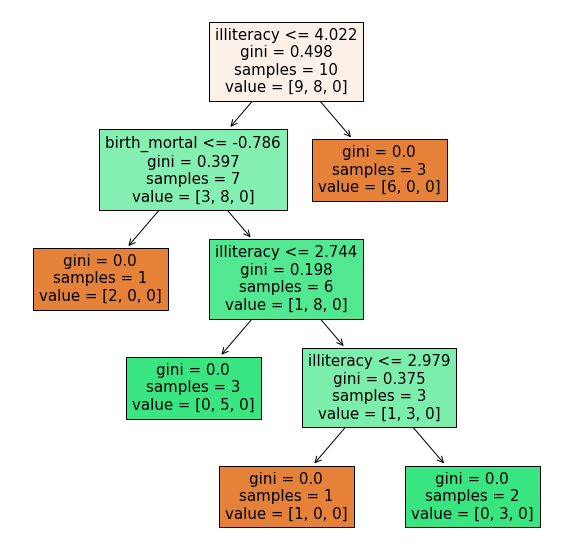

In [43]:
# visualizing Random Forest Classifier (trained model)
#------------------------------------------------------
# The code below visualizes the first decision tree.
# It does not require standarization and it is not affected by outliers.
# A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset 
# and uses averaging to improve the predictive accuracy and control over-fitting. 
# The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.

plt.figure(figsize=(10,10))
t=plot_tree(RFC.estimators_[0], feature_names=x_train.columns, filled=True)


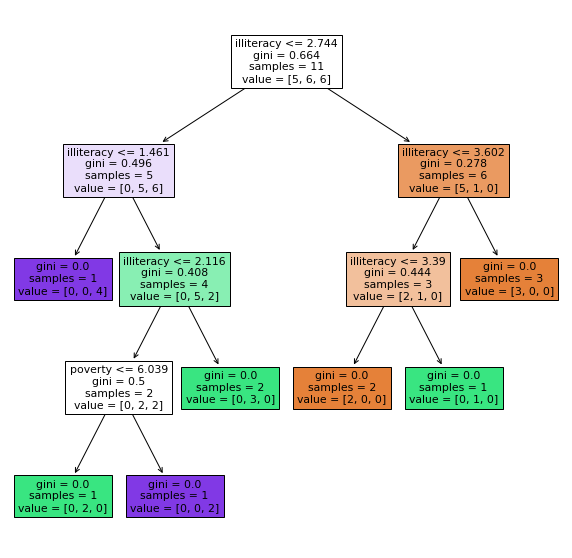

In [44]:
# The code below visualize the last tree
plt.figure(figsize=(10,10))
t=plot_tree(RFC.estimators_[69], feature_names=x_train.columns, filled=True)

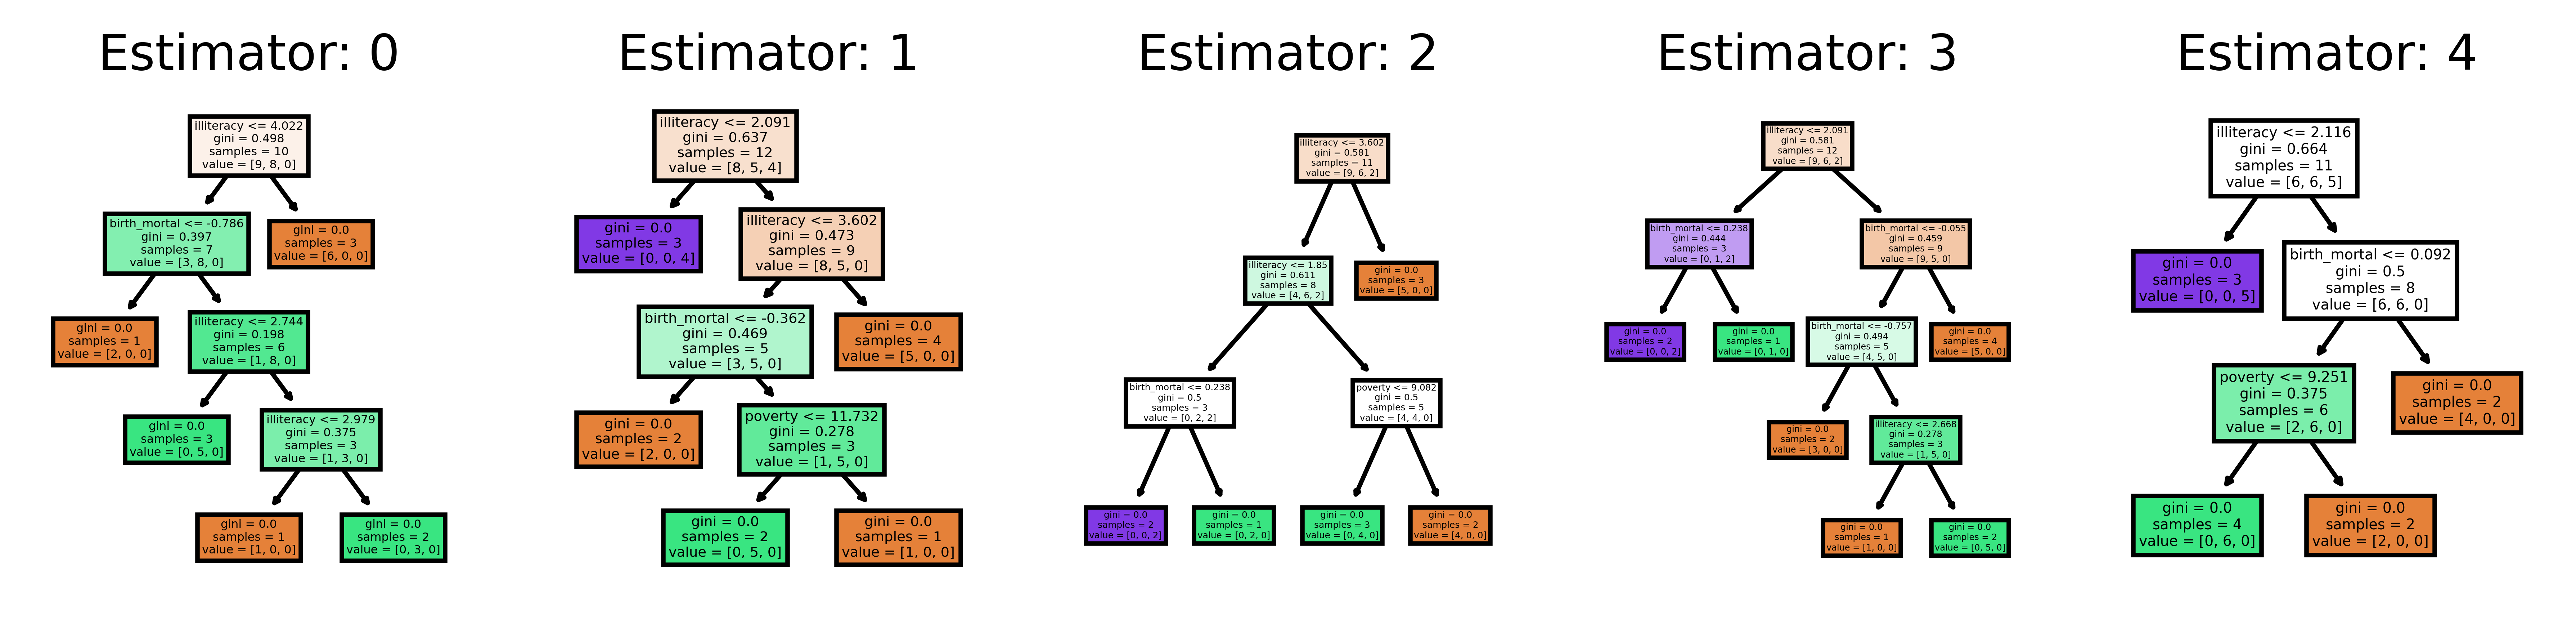

In [45]:
# The code below visualizes the first 5 from the random forest model fit above.

fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
for index in range(0, 5):
    plot_tree(RFC.estimators_[index],
                   feature_names=x_train.columns, 
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
fig.savefig('rfc_5trees.png')

In [46]:
y_train.value_counts()

poverty_index
High             9
Low              5
Middle           3
dtype: int64

In [47]:
RFC.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 70,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [48]:
RFC.n_estimators

70

In [49]:
RFC.criterion

'gini'

In [50]:

#5. Running predictions on the model
y_pred_model=RFC.predict(x_test)
y_pred_model

#H:0,m:1,L:2
# M HHH L
#Ajustamos los datos al modelo
# y_pred_model=y_pred_model.fit(x_test,y_test)

array(['Middle', 'High', 'High', 'High', 'Middle'], dtype=object)

In [51]:
y_test=np.array(y_test,dtype='object')
y_test

array([['Low'],
       ['Middle'],
       ['High'],
       ['High'],
       ['Middle']], dtype=object)

In [52]:

df_prediccion=pd.DataFrame(y_test,y_pred_model)
df_prediccion

,0
Middle,Low
High,Middle
High,High
High,High
Middle,Middle


[[2 0 0]
 [0 0 1]
 [1 0 1]]


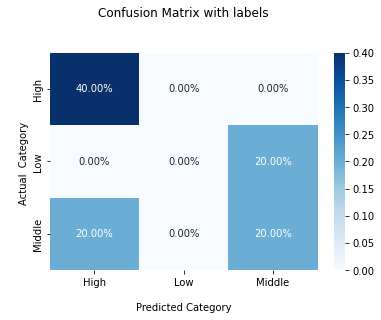

In [53]:
#6. Evaluating and visualizing model performance

# Confusion matrix
from sklearn.metrics import confusion_matrix
cf_matrix=confusion_matrix(y_test,y_pred_model)
print(cf_matrix)

# Plot confusion matrix
import seaborn as sns

ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Category');
ax.set_ylabel('\nActual  Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['High','Low','Middle'])
ax.yaxis.set_ticklabels(['High','Low','Middle'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [54]:
# metric 1. precission score
from sklearn.metrics import precision_score
ps=precision_score(y_test,y_pred_model,average='macro')
round(ps*100,2)

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


38.89

In [55]:
# metric 2. recall score
from sklearn.metrics import recall_score
rs=recall_score(y_test,y_pred_model,average='macro')
round(rs*100,2)

50.0

In [56]:
# metric 3. accuracy
from sklearn.metrics import accuracy_score
accs=accuracy_score(y_test,y_pred_model)
round(accs*100,2)

60.0

In [57]:
print("metric_1 (Precission_Score) :",round(ps*100,2))
print("metric_2 (Recall Score):",round(rs*100,2))
print("metric_3 (Accuracy):",round(accs*100,2))

metric_1 (Precission_Score) : 38.89
metric_2 (Recall Score): 50.0
metric_3 (Accuracy): 60.0


In [ ]:
# ¿ En base al resultado de las métricas el modelo es eficiente ? ¿ Cómo harian para mejorar la performance del modelo ? 